#  Homework 3 (HW3)

Deadline: November 18th Midnight

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW3/1)

In this exercise we  predict the quality of different wines! Can a winemaker predict whether his wine will be considered a good quality wine by the jury based on it's chemical properties only? 🍷 (50%)

**a)** We will work using the data available at the [UCI dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). It  contains data on 11 chemical properties (e.g. sugar content, pH, alcohol content, etc.) of thousands of north-Portugalian wines. Each wine has a quality-score on a scale of 10. 

* Import the **Red** wine data into a pandas dataframe from the [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). (You can import the data directly from the web page, without dowloading it to your computer!) The *quality* column will be the target variable, the rest will be the features. 
* This will be a binary classification problem, hence, redefine the target variable in the following way: let it be 0 if the *quality < 7* (bad wines) and let it be 1 if *quality $\geq$ 7* (good wines). Create separate *numpy arrays* to store the target and the rest of the attributes!  


In [2]:
import pandas as pd
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

In [3]:
# to split into multiple columns by delimiter
redwinecleaned = redwine.iloc[:,0].str.split(";", expand=True)
#to add column names to the new dataset
colnames = redwine.columns[0].split(';')
#cleaning column names
colnamesnew = [c.replace("\"", '') for c in colnames]
redwinecleaned.columns = colnamesnew


In [4]:
import numpy as np
#changing the quality value to be 0 if quality < 7, 1 if quality>=7
redwinecleaned["quality"] = np.where(redwinecleaned["quality"] < "7", 0, 1)

In [5]:
redwinecleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,0
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,0
1595,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,0
1596,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,0
1597,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,0


**b)** Classification, cross validation
* Perform a classification using the kNN algorithm! Using the 10-fold cross validation technique determine for what *k* value will the classifier's F-score be optimal! (Analyze values of *k* in a reasonable interval!) <br>
Present the boxplot of the obtained F-scores (the boxplot of 10 F-scores for each *k* values) against *k*!  <br>
(Hint: use the *model_selection.cross_val_score* function and set *scoring = 'f1'*!) 
<br>
(Hint2: use the boxplot function from the *seaborn* package!)


In [6]:
#knn algorithm using 10-fold cross validation
#determining for what k value will the classfiers F-score be optimal
#boxplot of the obtained F-scores

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#Dividing Data Into Features and Target(s)
feature_columns = colnamesnew[0:11]
target = colnamesnew[11]
X = redwinecleaned[feature_columns].values
y = redwinecleaned[target].values
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/Users/shrey/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

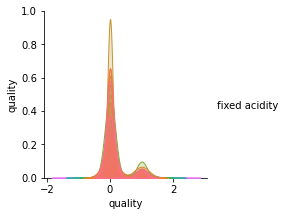

<Figure size 432x288 with 0 Axes>

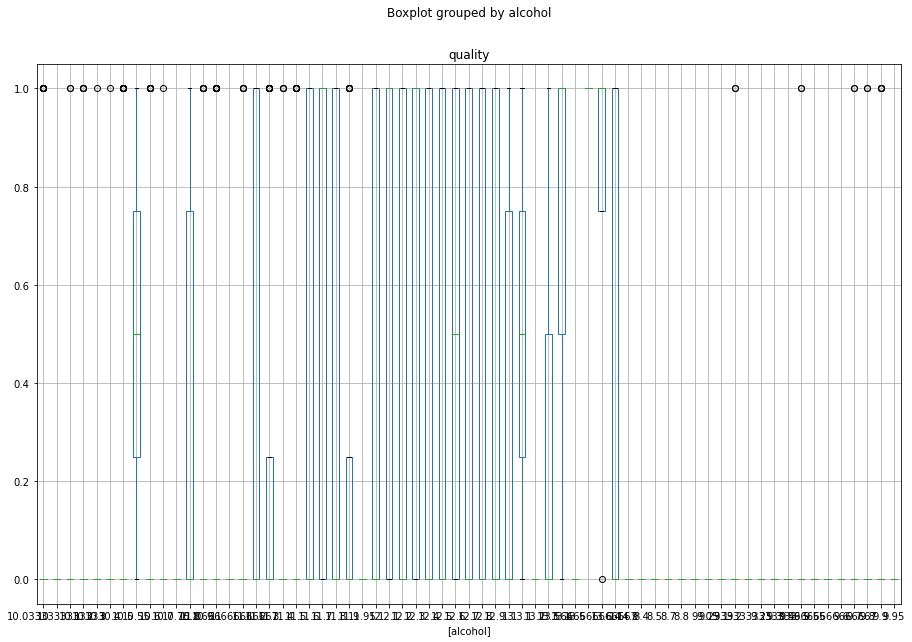

In [30]:
#Visualizing Dataset using Pairplot
plt.figure()
sns.pairplot(redwinecleaned, hue = "fixed acidity", size=3, markers=["o", "s", "D"])
plt.show()
#Visualizing Dataset using Boxplot
plt.figure()
redwinecleaned.boxplot(by="alcohol", figsize=(15, 10))
plt.show()

In [31]:
#Splitting the Data into Training and Testing Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
#Fitting the Model and Making Predictions 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [33]:
#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
#Calculating Model Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:89.69 %.


In [86]:
#Performing 10 fold Cross Validation on knn
k_list = list(range(1,21))
cv_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')
    cv_scores.append(scores)


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff58b83f850>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff58b83fdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff58b83f580>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff58b8493d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff58b8496a0>,
 'means': []}

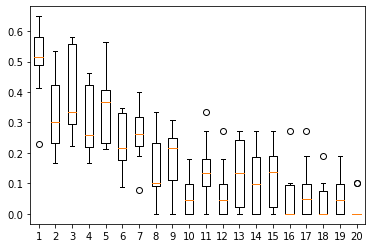

In [88]:
#Boxplot
plt.boxplot(cv_scores)

In [92]:
#Finding Best K
# As we can see from the box plot above, the best k is 1 - it has the highest f1 score

**c)** Now solve the classification problem using a decision tree! Repeat the analysis of part b), but now, let the examined parameter be the tree's maximum depth!

In [90]:
#Using decision tree
from sklearn.tree import DecisionTreeClassifier

k_list2 = list(range(1,21))
cv_scores2 = []
for j in k_list2:
    dec = DecisionTreeClassifier(max_depth=j)
    scores2 = cross_val_score(dec, X_train, y_train, cv=10, scoring='f1')
    cv_scores2.append(scores2)


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff558653550>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff558653af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff558653280>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff55865f0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff55865f3a0>,
 'means': []}

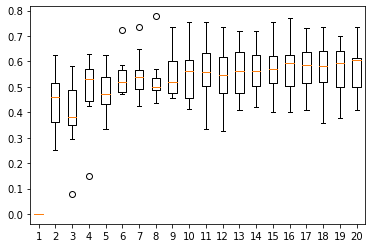

In [91]:
plt.boxplot(cv_scores2)

---

## Exercise 2 (HW3/2)

Using predictive analytics methods, we would like to identify first-year college students at risk of dropping out and academic failure. <span style="color:red">Write a one-page long essay covering the following points!</span> (50%)

**a)** Design the analysis, think through the stages of the analysis following CRISP-DM methodology! How can you state the problem as a data science problem? What machine learning approaches could be used here? (See Lecture 02!) 

**b)** Do you think that the requirements of a successful data science projects are met? Go through the 7 requirements that we have covered in class! (See Lecture 02!) 

**c)** What ethical questions are raised in this project? Mention utilizations that you think are useful and ethical and give examples of bad applications as well!


In [ ]:
#essay attached as part of submission